# 灰度腐蚀与膨胀

图像的膨胀（Dilation）和腐蚀（Erosion）是两种基本的形态学运算，主要用来寻找图像中的极大区域和极小区域。已知有如下的灰度图像A和结构元素B

In [1]:
#矩阵处理库
import numpy as np
#定义待处理的灰度图像A
data=[]
A=list(range(1,7))
for i in range(6):
    data.append(A.copy())
    A.insert(len(A),A[0])
    A.remove(A[0])
A=np.array(data)
#定义结构元素B
B=np.array([[0,1,0],[1,2,1],[0,1,0]])
print("A=\n",A,"\nB=\n",B)

A=
 [[1 2 3 4 5 6]
 [2 3 4 5 6 1]
 [3 4 5 6 1 2]
 [4 5 6 1 2 3]
 [5 6 1 2 3 4]
 [6 1 2 3 4 5]] 
B=
 [[0 1 0]
 [1 2 1]
 [0 1 0]]


计算进行腐蚀运算后的图像

$$
(f\ominus b)(s,t)=min \{
    f(s+x,t+y)-b(x,y)|
    (s+x,t+y)\in D_f;(x,y)\in D_b\}
$$

In [2]:
(rows,cols)=A.shape
A_Erosed=np.zeros((rows-2,cols-2))
for i in range(1,rows-1):
    for j in range(1,cols-1):
        block=A[i-1:i+2,j-1:j+2]#python 中是前闭后开，不包括后标
        res=np.min(block-B)
        A_Erosed[i-1,j-1]=res
print(A_Erosed.astype(int) )

[[ 1  2  1  0]
 [ 2  1  0 -1]
 [ 1  0 -1  0]
 [ 0 -1  0  1]]


计算进行膨胀运算后的图像

$$
(f\oplus b)(s,t)=max \{
    f(s-x,t-y)+b(x,y)|
    (s-x,t-y)\in D_f;(x,y)\in D_b\}
$$

In [3]:
(rows,cols)=A.shape
A_Dilated=np.zeros((rows+2,cols+2))#扩大一圈
A_expanded=np.zeros((rows+4,cols+4))#扩大两圈
A_expanded[2:rows+2,2:cols+2]=A#扩大矩阵方便截取

for i in range(1,rows+3):
    for j in range(1,cols+3):
        block=A_expanded[i-1:i+2,j-1:j+2]#python 中是前闭后开，不包括后标
        res=np.max(block+B.T)
        A_Dilated[i-1,j-1]=res
print(A_Dilated.astype(int) )

[[2 2 3 4 5 6 7 6]
 [2 3 4 5 6 7 8 7]
 [3 4 5 6 7 8 7 6]
 [4 5 6 7 8 7 6 3]
 [5 6 7 8 7 6 5 4]
 [6 7 8 7 6 5 6 5]
 [7 8 7 6 5 6 7 6]
 [6 7 6 3 4 5 6 5]]


# 使用matplot绘图

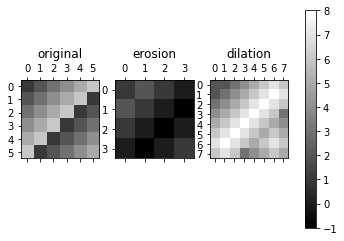

In [7]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(1,3)

im=axes[0].matshow(A, cmap = plt.cm.gray,vmin=-1,vmax=8)
axes[0].title.set_text('original')
im=axes[1].matshow(A_Erosed, cmap = plt.cm.gray,vmin=-1,vmax=8)
axes[1].title.set_text('erosion')
im=axes[2].matshow(A_Dilated,cmap = plt.cm.gray,vmin=-1,vmax=8)
axes[2].title.set_text('dilation')
fig.colorbar(im, ax=axes.ravel().tolist())
plt.show()

